<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/guia_3_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import inv #Función para invertir matrices
import matplotlib.pyplot as plt
from typing import Callable, Tuple
from mpl_toolkits.mplot3d import Axes3D


Guía 3 cálculo numérico

# Ejercicio 3

Se tiene una masa sujeta a un resorte. Suponiendo que no existe rozamiento, la posición $ y(t) $ de la masa a tiempo $ t $ está regida por la ecuación:
$ m \ddot{y} = -ky, $
donde $ m $ es la masa y $ k $ la constante del resorte.
Supongamos que la masa se encuentra en movimiento y que se registra que su posición a tiempo $ 0 $ es $ y(0) = 0 $, mientras que a cierto tiempo $ t_f $, es $ y(t_f) = y_f$ .

## a) Discretizar el intervalo $[0, t_f]$ con paso $ h $. Utilizando la discretización usual para la derivada segunda y teniendo en cuenta las condiciones de contorno, discretizar el problema, formulándolo como un sistema lineal.

## b) Hacer un programa que reciba como input la masa $ m $, la constante $ k $ y el paso $h $, construya la matriz del sistema, lo resuelva, y grafique la solución.

##c) Resolver para $t_f = 10$, con los siguientes datos:
$y_f = 1$, $m = \frac{1}{4}$, $k = \frac{1}{2}$

$y_f = 1$, $m = 0.025$, $k = \frac{1}{2}$

$y_f = 1$, $m = \frac{1}{4}$, $k = 0.05$

$y_f = 1$, $m = 0.025$, $k = 0.05$

Observar el efecto que producen las modificaciones en los distintos parámetros.

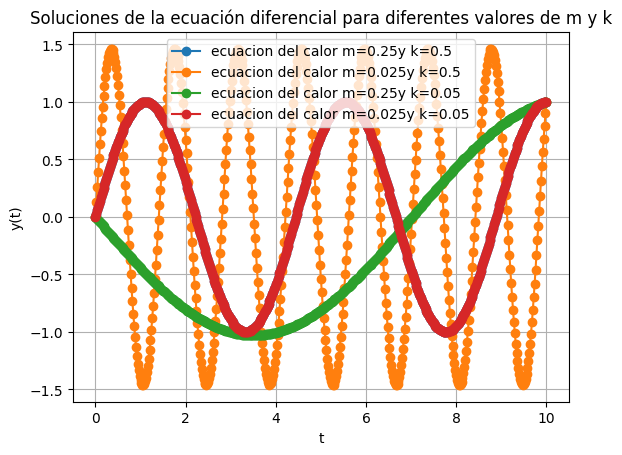

In [ ]:
#ej 3b, defino la matriz de la ecuacion diferencial

#alpha = 0 (valor inicial), beta = valor final

alpha = 0
beta = 1
valores_k = [1/2, 0.05]
valores_m = [1/4,0.025]
h= 0.02
x0 = 0
xf = 10
n = int((xf-x0)/h)
def Mat_A(k,m,h,x0,xf):
  N = int((xf - x0)/h)
  diagonal = (-2+k*h**2/m) * np.eye(N-1)
  diagonal_superior = np.eye(N-1, k=1)
  diagonal_inferior = np.eye(N-1, k=-1)
  return diagonal + diagonal_inferior + diagonal_superior

def Vec_b(h,beta,x0,xf):
  n = int((xf-x0)/h)
  b = np.zeros(n-1)
  b[-1] = -beta
  return b

#este b tiene las coordenadas (y1,...,y_n-1), necesito sumarle la y0 y la yn
for k in valores_k:
  for m in valores_m:
    b = Vec_b(h,beta,x0,xf)
    A = Mat_A(k,m,h,x0,xf)
    u = np.dot(inv(A),b)
    u = [alpha]+list(u)+[beta]
    x = np.linspace(x0,xf,n+1)
    plt.plot(x, u , 'o-', label = "ecuacion del calor m="+str(m)+"y k="+str(k))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación diferencial para diferentes valores de m y k')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 4

Si al problema anterior se le agrega rozamiento y un forzante se obtiene una ecuación de la forma:
$ m\ddot{y} = -ky - by\dot{y} + f $
donde $b$ es el coeficiente de rozamiento y $f = f(t)$ el forzante.

item[a)] Escribir el sistema discretizado que corresponde a utilizar la discretización usual de la derivada segunda y diferencias centradas para la derivada primera.

item[b)] Repetir usando diferencias forward para la derivada primera.

item[c)] Modificar el programa del ejercicio anterior para incorporar los nuevos términos de la ecuación utilizando diferencias centradas o forward para la derivada primera.

item[d)] Para $f = 0$ proponer soluciones de la forma $y(t) = Ae^{\lambda t}$. Hallar valores de $\lambda$ en función de los parámetros $m$, $k$ y $b$. Estudiar el comportamiento de la solución de acuerdo a la naturaleza de los valores de $\lambda$ hallados.

item[e)] Resolver tomando $y_0 = 1$, $t_f = 10$, $y_f = 0$, con distintas combinaciones de los parámetros:

$m = 0.25$, $m = 0.025$.

$k = 0.5$, $k = 0.05$.

$b = $5 * 10^{-3}$, $b = 0.05$, $b = 0.1$.

Analizar si los resultados obtenidos son cualitativamente consistentes con lo esperado.



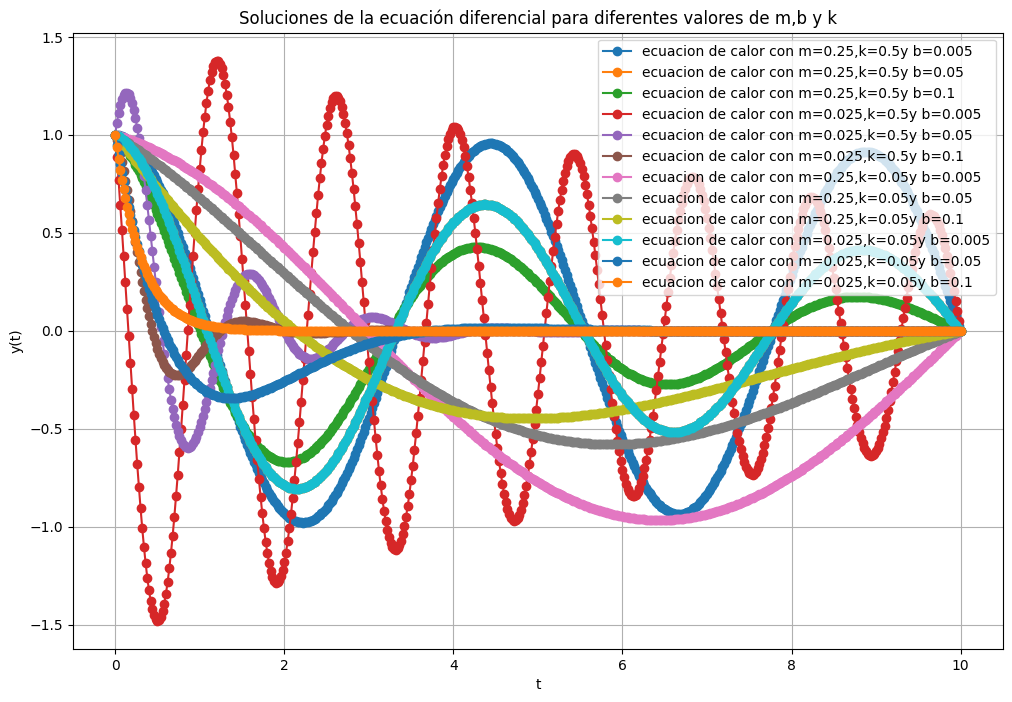

In [ ]:
alpha =1
beta = 0
def Mat_4(b,k,m,h,x0,xf):
  N = int((xf - x0)/h)
  diagonal = (-2+k*h**2/m-(b*h)/m) * np.eye(N-1)
  diagonal_superior = (1+(b*h)/m)*np.eye(N-1, k=1)
  diagonal_inferior = np.eye(N-1, k=-1)
  return diagonal + diagonal_inferior + diagonal_superior
def Vect_b(b,h,m,beta,x0,xf,f):
  n = int((xf-x0)/h)
  be = np.zeros(n-1)
  exis = np.linspace(x0+h,xf-h,n-1)
  for i in range(n-1):
    be[i] = f(exis[i])*h**2/m
  be[-1] = f(exis[-1]) *h**2/m - beta*(1+(b*h)/(m))
  be[0] -= alpha
  return be
def f(x):
  return 0
valores_b = [5e-3,0.05,0.1]
plt.figure(figsize=(12, 8))
for k in valores_k:
  for m in valores_m:
    for b in valores_b:
      b_4 = Vect_b(b,h,m,beta,x0,xf,f)
      A_4 = Mat_4(b,k,m,h,x0,xf)
      u = np.dot(inv(A_4),b_4)
      u = [alpha]+list(u)+[beta]
      x_2 = np.linspace(x0,xf,n+1)
      plt.plot(x_2, u , 'o-', label = "ecuacion de calor con m="+str(m)+",k="+str(k)+"y b="+str(b))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación diferencial para diferentes valores de m,b y k')
plt.legend()
plt.grid(True)

Ejercicio 6. Considerar el problema del calor estacionario en el intervalo [0, 1]:

$- \alpha u''(x) = f(x),$

 $u(0) = u(1) = 0$.

donde u representa la distribucion de temperatura generada por una fuente f y α > 0 es el
coeficiente de difusividad termica.

(a) Formular el problema de forma matricial.

(b) Estudiar el error de truncado.

(c) Resolver y graficar la solucion para distintos valores de α.

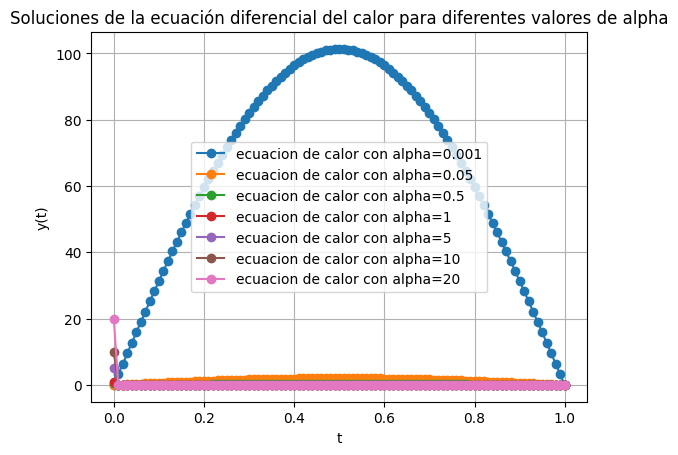

In [ ]:
def Mat_6(h,x0,xf):
  N = int((xf - x0)/h)
  diagonal = (-2) * np.eye(N-1)
  diagonal_superior = np.eye(N-1, k=1)
  diagonal_inferior = np.eye(N-1, k=-1)
  return diagonal + diagonal_inferior + diagonal_superior

def f(x):
    return np.sin(np.pi * x)  # Ejemplo de una función fuente
def b_seis(h,alfa,x0,xf,f):
  n = int((xf-x0)/h)
  x = np.linspace(x0+h,xf-h,n-1)
  b_ejseis = np.zeros(n-1)
  for j in range(n-1):
    b_ejseis[j] = f(x[j])*(-h**2/alfa)
  return b_ejseis
x0,xf = 0,1
h = 0.01
valores_alpha = [0.001,0.05,1/2,1,5,10,20] #valores iniciales
beta = 0 #valor final
n = int((xf-x0)/h)
for alpha in valores_alpha:
  b6 = b_seis(h,alpha,x0,xf,f)
  A_6 = Mat_6(h,x0,xf)
  u = np.dot(inv(A_6),b6)
  u = [alpha]+list(u)+[beta]
  x_6 = np.linspace(x0,xf,n+1)
  plt.plot(x_6, u , 'o-', label = "ecuacion de calor con alpha="+str(alpha))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación diferencial del calor para diferentes valores de alpha')
plt.legend()
plt.grid(True)


Vamos a trabajar con la ecuación del calor que está en el ejercicio 7 y 8 de la práctica 3:

$$
\begin{cases}
    u_t(x,t) = \alpha u_{xx}(x,t) \quad &x\in(0,1) t>0\\
    u(x,0) = u_0(x) \quad &x\in[0,1]\\
    u(0,t) = u(1,t)=0 &t>0\\
\end{cases}
$$

donde tomamos $\alpha=1$
Vimos que el problema puede aproximarse de manera discreta con un esquema explícito de paso temporal $k$ y espacial $h$.

$$U_i^{j+1} = (1-2r)U_i + r(U_{i-1}+U_{i+1})$$

donde $r=\frac{k}{h^2}$

A su vez podemos escribir matricialmente el esquema

$$U^{j+1}=AU^j$$

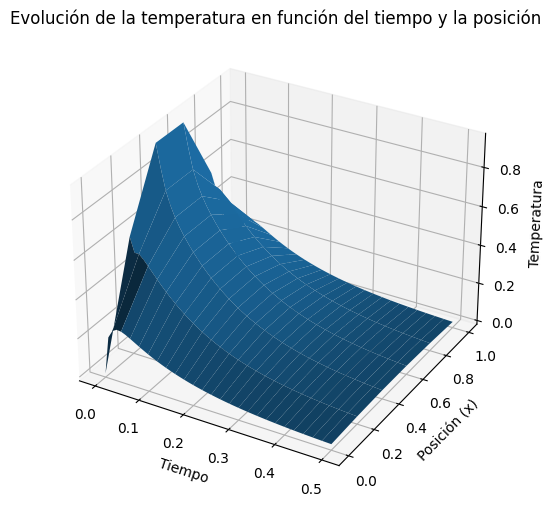

In [ ]:
L = 1 # Tamaño de la varilla
t0 = 0 # tiempo inicial
tf = 0.5 # Tiempo final

# Parametros del método
h = 0.01
k = np.sqrt(3*h)
def matriz_evolucion(N: int, r: float, alpha: float = 1.) -> np.ndarray:
    ''' Construye la matriz de evolución de la ecuacion del calor para la discretización forward en t y centradas en x.'''
    # Me armo las MATRICES que solo tienen elementos en la diagonal
    diagonal = (1-2*r) * np.eye(N)
    diagonal_superior = r * np.eye(N, k=1)
    diagonal_inferior = r * np.eye(N, k=-1)
    return diagonal + diagonal_inferior + diagonal_superior
def integrar(t0: float, tf: float, k: float, h: float, L: float, u0: Callable) -> Tuple[np.ndarray,np.ndarray,np.ndarray]:
    # Calculo la cantidad de puntos en la grilla
    Nx = int(L/k)+1
    Nt = int((tf-t0)/h)+1

    # Me guardo lugar para mi solución
    u = np.empty((Nx, Nt))

    # Escribo los valores que delimitan mi grilla
    t = np.linspace(t0, tf, Nt)
    x = np.linspace(0, L, Nx)
    # Obtengo mi matriz de evolucion
    A = matriz_evolucion(Nx,(h/k**2))

    # Pongo la condicion inicial
    u[:,0] = u0(x)
    u[0,:] = 0
    u[-1,:] = 0

    for i in range(Nt-1):
            u[:,i+1] = A @ u[:,i]
    return (t, x, u)
def u0(x):
  return np.sin(np.pi*x)
t, x, u = integrar(t0, tf, k, h, L, u0)
# Crear malla de tiempo y espacio
X, T = np.meshgrid(x,t)
# Crear la figura
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#Graficar la solución en 3D

ax.plot_surface(T, X, u.T)
# Añadir etiquetas y título
ax.set_xlabel('Tiempo')
ax.set_ylabel('Posición (x)')
ax.set_zlabel('Temperatura')
ax.set_title('Evolución de la temperatura en función del tiempo y la posición')
plt.show()

Ejercicio 9

Modificar el programa del Ejercicio 8 para que resuelva la ecuación $u_t(x, t) = \alpha u_{xx}(x, t) + f(x, t)$, donde $f$ es una fuente. Resolver tomando $g(x) \equiv 0$, para alguna $f$. Por ejemplo, pueden tomarse:

$f(x, t) = x(1 - x)$

$f(x, t) = \chi_{[\frac{1}{4}, \frac{3}{4}]}(x)$

$f(x, t) = \chi_{[\frac{1}{4}, \frac{3}{4}]}(x) \sin(t)$

$f(x, t) = \chi_{[\frac{1}{8}, \frac{3}{8}]}(x) \chi_{[2i, 2i+1]}(t) + \chi_{[\frac{5}{8}, \frac{7}{8}]}(x) \chi_{[2i+1, 2i+2]}(t)$, tomando $i = 0, \ldots, I - 1$, $t_f = 2I$.
Para las $f$ independientes de $t$, comparar la solución a tiempo $t_f$ con la obtenida al resolver el problema estacionario del Ejercicio 6.

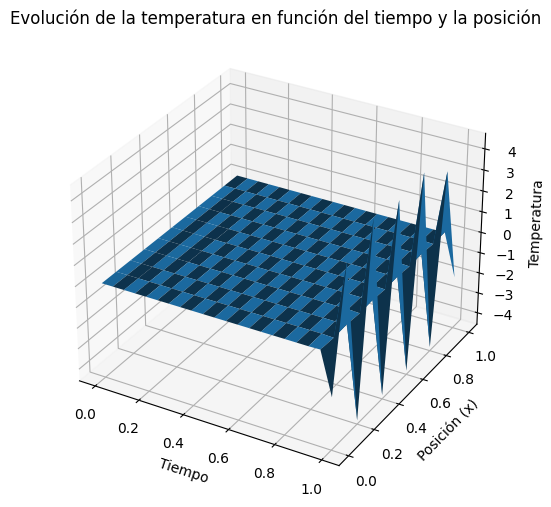

In [ ]:
def matriz_evolucion(N: int, r: float, alpha: float = 1.) -> np.ndarray:
    '''Construye la matriz de evolución de la ecuación del calor para la discretización forward en t y centradas en x.'''
    # Me armo las matrices que solo tienen elementos en la diagonal
    diagonal = (1 - 2 * r) * np.eye(N)
    diagonal_superior = r * np.eye(N, k=1)
    diagonal_inferior = r * np.eye(N, k=-1)
    return diagonal + diagonal_inferior + diagonal_superior

def integrar(t0: float, tf: float, k: float, h: float, L: float, u0: Callable, f: Callable) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    # Calculo la cantidad de puntos en la grilla
    Nx = int(L / k) + 1
    Nt = int((tf - t0) / h) + 1

    # Me guardo lugar para mi solución
    u = np.empty((Nx, Nt))

    # Escribo los valores que delimitan mi grilla
    t = np.linspace(t0, tf, Nt)
    x = np.linspace(0, L, Nx)

    # Obtengo mi matriz de evolucion
    r = k / (h**2)
    A = matriz_evolucion(Nx, r)

    # Pongo la condicion inicial
    u[:, 0] = u0(x)
    u[0, :] = 0
    u[-1, :] = 0

    # Iteración en el tiempo con la fuente
    for i in range(Nt - 1):
        f_vec = f(x, t[i]) * h  #se mueve en todo el espacio y evaluo en el tiempo anterior
        u[:,i+1] = A @ u[:,i] + f_vec

    return (t, x, u)

# Definir la función inicial u0 y la fuente f
def u0(x):
    return np.sin(np.pi * x)

def f(x, t):
    return t* (1 - t)

# Parámetros
t0 = 0
tf = 1
k = 0.1
h = 0.05
L = 1

# Integrar y obtener la solución
t, x, u = integrar(t0, tf, k, h, L, u0, f)

# Graficar la solución
X, T = np.meshgrid(x, t)
# Crear la figura
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#Graficar la solución en 3D

ax.plot_surface(T, X, u.T)
# Añadir etiquetas y título
ax.set_xlabel('Tiempo')
ax.set_ylabel('Posición (x)')
ax.set_zlabel('Temperatura')
ax.set_title('Evolución de la temperatura en función del tiempo y la posición')
plt.show()